In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
import seaborn as sns

%matplotlib inline

In [49]:
def reverse(a):
    str = ""
    for i in a:
        str = i + str
    return str

In [50]:
a = 'IloveTraveling'

In [51]:
print("the original string is: ",end="")
print(a)

the original string is: IloveTraveling


In [52]:
print("The reversed string(using loops) is: ",end="")
print(reverse(a))

The reversed string(using loops) is: gnilevarTevolI


Complete the function below that can be used to calculate and return the posterior probability of an event A, given the known outcome of Event B using Bayes Theorem:
def bayes(a, b_given_a, b_given_not_a):

    """
    Calculates P(A | B) using bayes theorem.

    Args:
        a: P(A)
        b_given_a: P(B | A)
        b_given_not_a: P(B | ~A)

    Returns:
        P(A | B)
    """

In [53]:
#bayes theorem: P(A|B) = P(B|A)*P(A)) / P(B)
    # calculating prob of not A n_a = 1 - a 
    # calculating prob of b prob_b = b_given_a * a + b_given_not_a * n_a
    # calculating prob of a given b prob_a_giv_b =(b_given_a*a,)/prob_b return prob_a_giv_b

def bayes(a, b_given_a, b_given_not_a):
    post_prob = (b_given_a * a) / ((b_given_a * a) + b_given_not_a * (1 - a))
    return post_prob

print(bayes(0.9, 3.5, 7))

0.8181818181818182


Analyze the teams dataset from the Lahman baseball records. This dataset contains season statistics for each Major League Baseball team.

a. For all records since 1995, plot histograms for the following variables. Which distribution do they appear to follow? Consider what each variable is measuring along with the histogram's shape.

 - Stolen bases per game
 - Wins
 - Earned run average
b. Conduct some further exploratory data analysis on this dataset. Consider qualities like distributions, correlations and trends over time. Try to find something interesting to say about the data, and use visualizations to support your argument.

Choose any two of the variables from 3. Draw 1,000 samples, taking the mean of 100 observations each time. Plot the frequencies of the sample means. What distribution does this appear to follow?

In [64]:
url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lahman-teams.csv'
baseball_team = pd.read_csv(url)

In [65]:
baseball_team.head(2)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1


In [75]:
#baseball_team.info()

In [76]:
baseball_team_95 = baseball_team.loc[baseball_team["yearID"] >= 1995]
baseball_team_95.head(2)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2181,1995,NL,ATL,ATL,E,1,144,72.0,90,54,...,113.0,0.98,Atlanta Braves,Atlanta-Fulton County Stadium,2561831.0,103,102,ATL,ATL,ATL
2182,1995,AL,BAL,BAL,E,3,144,72.0,71,73,...,141.0,0.98,Baltimore Orioles,Oriole Park at Camden Yards,3098475.0,102,101,BAL,BAL,BAL


In [80]:
baseball_team_95['SB_per_game'] = baseball_team_95['SB'] / baseball_team_95['G']

<ipython-input-80-7cf1c7ad8dcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseball_team_95['SB_per_game'] = baseball_team_95['SB'] / baseball_team_95['G']


(array([ 19.,  87., 127., 145., 102.,  74.,  43.,  18.,   4.,   5.]),
 array([0.19135802, 0.30416667, 0.41697531, 0.52978395, 0.64259259,
        0.75540123, 0.86820988, 0.98101852, 1.09382716, 1.2066358 ,
        1.31944444]),
 <BarContainer object of 10 artists>)

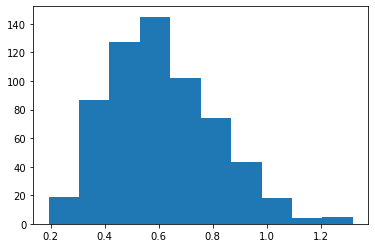

In [82]:
plt.hist(baseball_team_95['SB_per_game'])

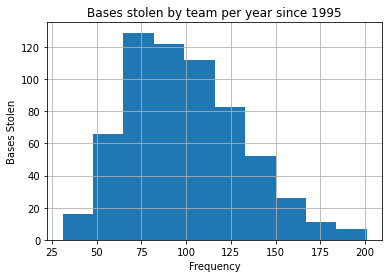

In [68]:
#bases stolen
#baseball_team_95.SB.hist()
#plt.xlabel("Frequency")
#plt.ylabel("Bases Stolen")
#plt.title("Bases stolen by team per year since 1995")
#plt.show()

plt.hist(baseball_team)


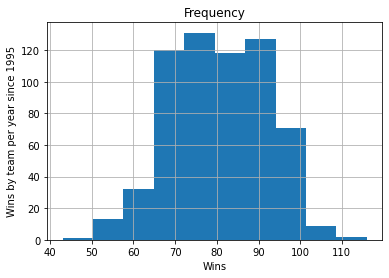

In [69]:
#wins
#baseball_team_95.W.hist()
#plt.xlabel("Wins")
#plt.ylabel("Wins by team per year since 1995")
#plt.title("Frequency")
#plt.show()

(array([  1.,  13.,  32., 120., 131., 118., 127.,  71.,   9.,   2.]),
 array([ 43. ,  50.3,  57.6,  64.9,  72.2,  79.5,  86.8,  94.1, 101.4,
        108.7, 116. ]),
 <BarContainer object of 10 artists>)

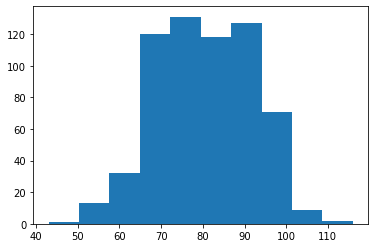

In [83]:
plt.hist(baseball_team_95['W'])

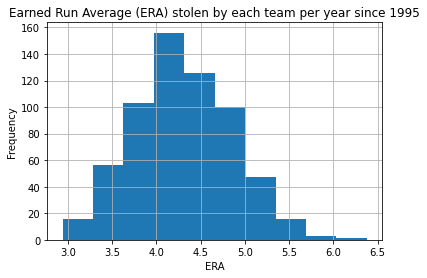

In [70]:
# Earnings
#baseball_team_95.ERA.hist()
#plt.xlabel("ERA")
#plt.ylabel("Frequency")
#plt.title("Earned Run Average (ERA) stolen by each team per year since 1995")
#plt.show()

(array([ 16.,  56., 103., 156., 126., 100.,  47.,  16.,   3.,   1.]),
 array([2.94 , 3.284, 3.628, 3.972, 4.316, 4.66 , 5.004, 5.348, 5.692,
        6.036, 6.38 ]),
 <BarContainer object of 10 artists>)

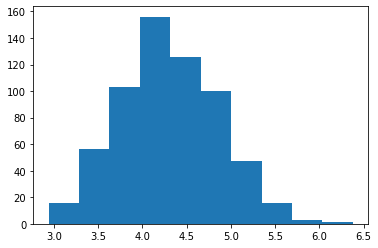

In [84]:
plt.hist(baseball_team_95['ERA'])

In [85]:
#baseball.corr()

In [92]:
y_ID_attend = baseball_team_95 ['yearID'].corr(baseball_team_95['attendance'])
print (y_ID_attend)

0.1603229006363417


In [71]:
avg = baseball_team['attendance'].mean()
avg

1344345.530482977

In [72]:
med = baseball_team['attendance'].median()
med

1140347.5

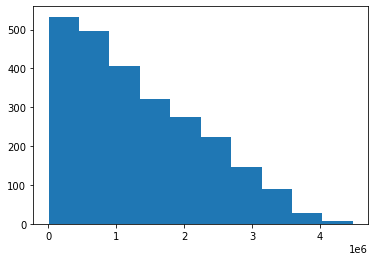

In [73]:
plt.hist(baseball_team['attendance'])
plt.show()

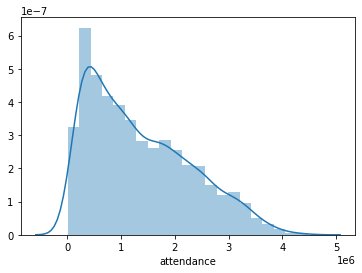

In [74]:
sns.distplot(baseball_team["attendance"])
plt.show()

#4

In [94]:
choice = []
for i in range(1,1000):
    wins_baseball_team = baseball_team['W'].sample(n=100)
    wins_aver = wins_baseball_team.mean()
    choice.append(wins_aver)
    
    

<AxesSubplot:>

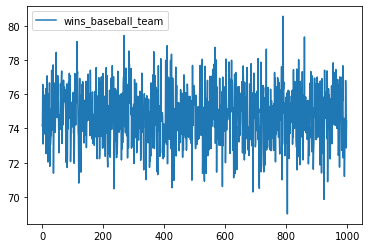

In [95]:
chart = pd.DataFrame({'wins_baseball_team' : choice})
chart.plot()

In [98]:
choices = []
for i in range(1,1000):
    ERA_baseball_team = baseball_team['ERA'].sample(n=100)
    ERA_aver = ERA_baseball_team.mean()
    choices.append(ERA_aver)

<AxesSubplot:>

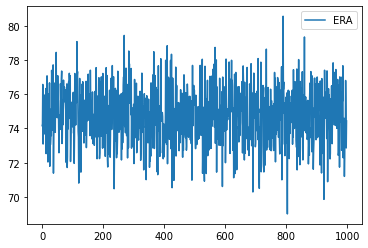

In [99]:
charts = pd.DataFrame({'ERA' : choice})
charts.plot()